# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [ ]:
#Three observations from the data below: 
#1. The higher the weight of the mouse, the higher the voume. 
#2. Capomulin has the lowest mean volume which indicates it is effective in reducing tumor size. 
#3. Ketapril has the highest mean volume which indicates it is the least effective drug used.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_data= pd.merge(mouse_metadata,study_results)
# Display the data table for preview
merge_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
df = merge_data.loc[merge_data["Mouse ID"]!= "g989"]
df.shape
mice_num = df["Mouse ID"].value_counts()
mice_num = len(mice_num)
mice_num

248

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merge_data[merge_data.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicate_mice_ids = duplicate_mice["Mouse ID"].unique()
duplicate_mice_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merge_data.drop_duplicates(subset=["Mouse ID"], keep="first")
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [5]:
# Checking the number of mice in the clean DataFrame.
df = merge_data.loc[merge_data["Mouse ID"]!= "g989"]
df.shape
mice_num = df["Mouse ID"].value_counts()
mice_num = len(mice_num)
mice_num

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_stats = summary_stats.rename(columns={"mean": "Mean", "median": "Median", "var": "Variance", "std": "Standard Deviation", "sem": "SEM"})
# Assemble the resulting series into a single summary DataFrame.
summary_stats


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,45.0,45.0,0.0,0.0,0.0
Ceftamin,45.0,45.0,0.0,0.0,0.0
Infubinol,45.0,45.0,0.0,0.0,0.0
Ketapril,45.0,45.0,0.0,0.0,0.0
Naftisol,45.0,45.0,0.0,0.0,0.0
Placebo,45.0,45.0,0.0,0.0,0.0
Propriva,45.0,45.0,0.0,0.0,0.0
Ramicane,45.0,45.0,0.0,0.0,0.0
Stelasyn,45.0,45.0,0.0,0.0,0.0


In [7]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats.head()


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

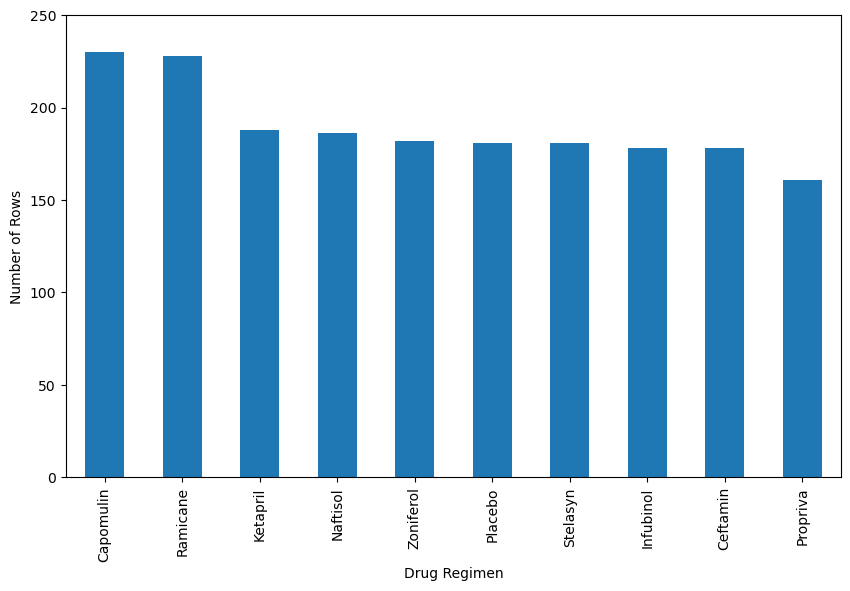

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = merge_data['Drug Regimen'].value_counts()
ax = drug_counts.plot(kind='bar', figsize=(10, 6))
ax.set_ylim(0, 250)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.show()


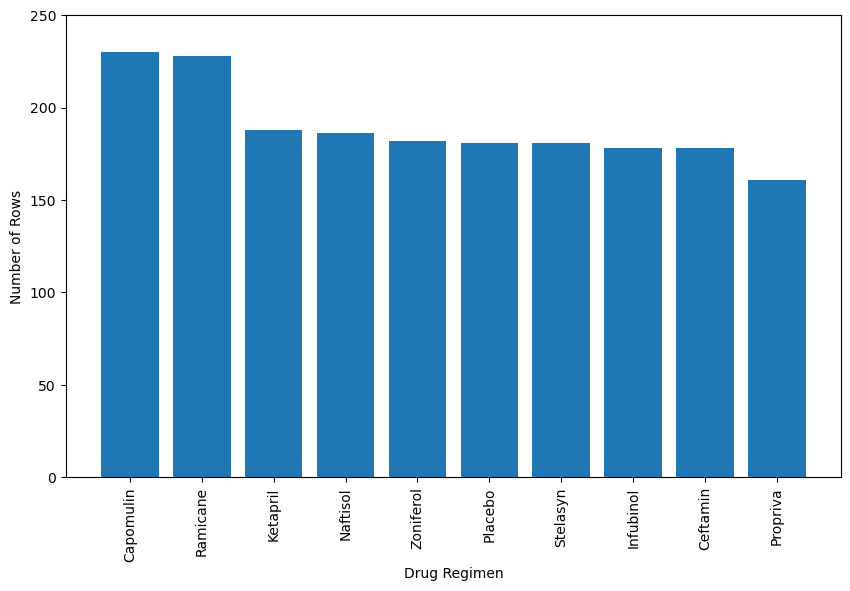

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = merge_data['Drug Regimen'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(drug_counts.index, drug_counts)
plt.ylim(0, 250)
plt.xticks(rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.show()



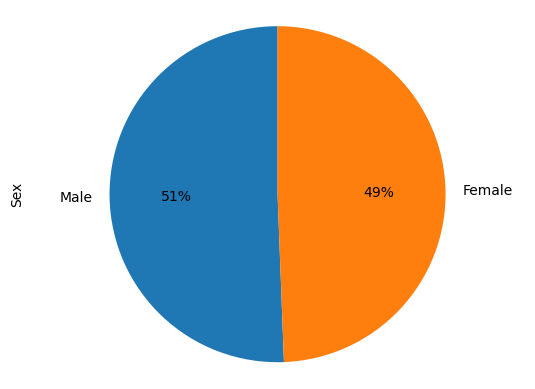

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = merge_data['Sex'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.0f%%', startangle=90)
plt.axis("equal")
plt.show()

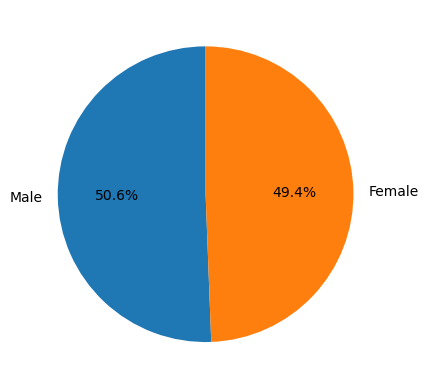

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = merge_data['Sex'].value_counts()
labels = gender_counts.index
values = gender_counts.values
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()

## Quartiles, Outliers and Boxplots

In [9]:
# Group the data by 'Mouse ID' and find the maximum 'Timepoint' for each mouse
last_timepoint = merge_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
# Merge the 'last_timepoint' DataFrame with the original DataFrame on 'Mouse ID' and 'Timepoint'
final_tumor_volume = pd.merge(last_timepoint, merge_data, on=['Mouse ID', 'Timepoint'], how='left')
# Filter the DataFrame to include only the desired treatment regimens
desired_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(desired_regimens)]


In [10]:
# Put treatments into a list for the loop
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor volume data
tumor_volume_data = []

# Loop through each treatment
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset
    tumor_volume_data.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Print potential outliers
    outliers = tumor_volume[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print(f"{treatment}: {outliers}")



Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


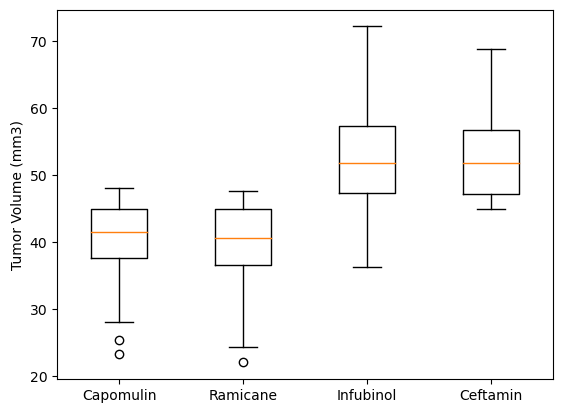

In [11]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
desired_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = merge_data[merge_data['Drug Regimen'].isin(desired_regimens)]
tumor_volume_data = {}

for regimen in desired_regimens:
    tumor_volume_data[regimen] = filtered_data.loc[filtered_data['Drug Regimen'] == regimen, 'Tumor Volume (mm3)']

data = [tumor_volume_data[regimen] for regimen in desired_regimens]
plt.boxplot(data, labels=desired_regimens)
plt.ylabel('Tumor Volume (mm3)')
plt.show()



## Line and Scatter Plots

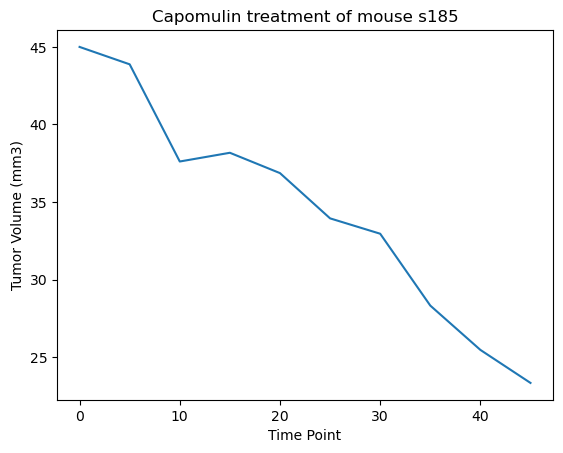

In [12]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = merge_data[merge_data['Drug Regimen'] == 'Capomulin']
mouse_id = 's185'
single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'])
plt.title(f'Capomulin treatment of mouse {mouse_id}')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


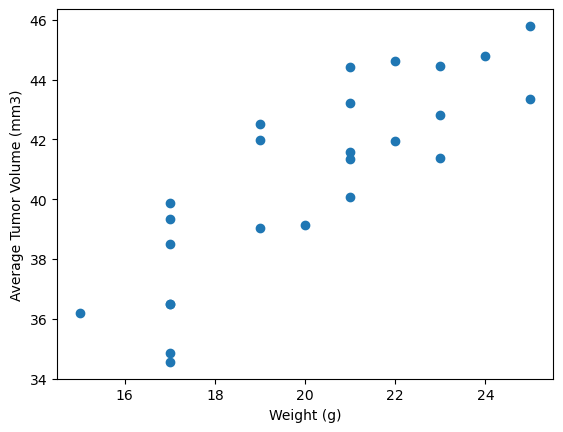

In [13]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = merge_data[merge_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
merged_data = pd.merge(mouse_metadata, average_tumor_volume, on='Mouse ID')
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is  0.841936342469472


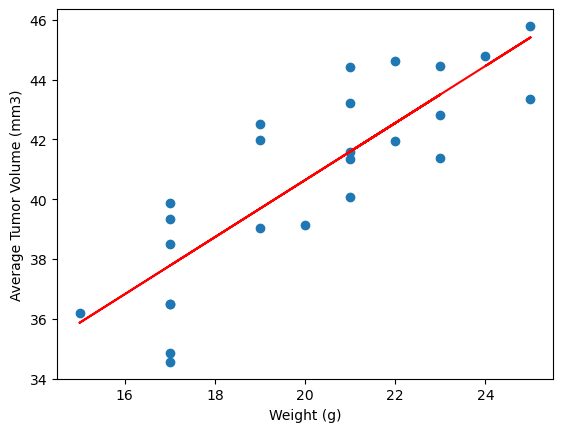

In [17]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = merge_data[merge_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
merged_data = pd.merge(mouse_metadata, average_tumor_volume, on='Mouse ID')
weight = merged_data['Weight (g)']
tumor_volume = merged_data['Tumor Volume (mm3)']
correlation_coefficient = st.pearsonr(weight, tumor_volume)[0]
print("The correlation between mouse weight and the average tumor volume is ", correlation_coefficient)
slope, intercept, r_value, p_value, std_err = st.linregress(weight, tumor_volume)
regression_line = slope * weight + intercept
plt.scatter(weight, tumor_volume)
plt.plot(weight, regression_line, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
